In [4]:
import numpy as np
import pandas as pd

In [5]:
df= pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...,NaN,NaN,NaN
532,ham,Gudnite....tc...practice going on,NaN,NaN,NaN
2451,ham,I know complain num only..bettr directly go to...,NaN,NaN,NaN
1181,ham,You flippin your shit yet?,NaN,NaN,NaN
3481,spam,Do you want a NEW video phone750 anytime any n...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [10]:
#1. Data Cleaning
#2.EDA
#3. Text Pre processing
#4. Model Building
#5. Evaluation
#6 . Improvements
#7. Website
#8. Website Deployments

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [29]:
df.sample(5)

,target,text
4609,ham,Just glad to be talking to you.
1237,ham,Is ur paper in e morn or aft tmr?
1924,ham,Ok
908,ham,WHITE FUDGE OREOS ARE IN STORES
2885,ham,No probs hon! How u doinat the mo?


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [31]:
#renaming the column names:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [12]:
df.sample(5)

,v1,v2
4481,ham,What do u reckon as need 2 arrange transport i...
563,spam,GENT! We are trying to contact you. Last weeke...
1691,ham,I don't know but I'm raping dudes at poker
157,ham,"Hello, my love. What are you doing? Did you ge..."
276,ham,Tell rob to mack his gf in the theater


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target']= encoder.fit_transform(df['target'])

KeyError: 'target'

In [ ]:
df.head()

In [15]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

df.duplicated().sum()

In [16]:
df= df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [24]:
df.shape

(5169, 2)

## 2. EDA


In [34]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

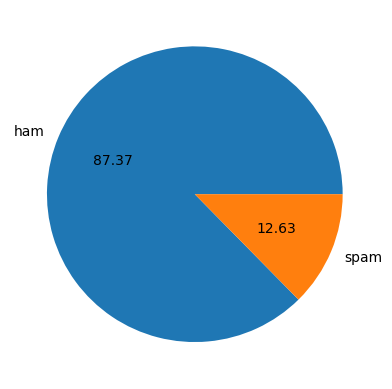

In [42]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [43]:
#data is imbalanced

In [44]:
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [46]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [51]:
df['num_characters']=df['text'].apply(len)

In [52]:
df.head

<bound method NDFrame.head of      target                                               text  num_characters
0       ham  Go until jurong point, crazy.. Available only ...             111
1       ham                      Ok lar... Joking wif u oni...              29
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       ham  U dun say so early hor... U c already then say...              49
4       ham  Nah I don't think he goes to usf, he lives aro...              61
...     ...                                                ...             ...
5567   spam  This is the 2nd time we have tried 2 contact u...             161
5568    ham              Will Ì_ b going to esplanade fr home?              37
5569    ham  Pity, * was in mood for that. So...any other s...              57
5570    ham  The guy did some bitching but I acted like i'd...             125
5571    ham                         Rofl. Its true to its name              26

[5169 rows x 3 column

In [53]:
df.heaf()

AttributeError: 'DataFrame' object has no attribute 'heaf'

In [54]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [59]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [60]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [63]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [69]:
df[df['target'] == 0]['num_characters','num_words','num_sentences'].des

KeyError: ('num_characters', 'num_words', 'num_sentences')